In [9]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path ='../results/exp9'

In [6]:
final_df = pd.DataFrame(columns=['graph','N1','N2',"QID","Query Limit","Total Queries","World Size", "Degree","Overtime","Time",])
graphs = ['ego-facebook','government', 'amazon_q']
for  graph in graphs:
    new_path = os.path.join(path,graph)
    worlds = os.listdir(new_path)
    #print(f" Graph: {graph}")
    for i in worlds:
        new_path2 = os.path.join(new_path,i)
        total_time = 0
        #print(f"    World: {i}")
        total_lines =0
        for j in os.listdir(new_path2):
            df = pd.read_csv(os.path.join(new_path2,j),sep="|")
            #print(f"        lines: {len(df)}")
            total_lines +=len(df)
            time = df.iloc[len(df)-1]["TotalTime"]
            if(type(time)==str):
                time = int(time.replace(",",""))
            n1,n2, qid,degree = df.iloc[0]["N1"],df.iloc[0]["N2"],df.iloc[0]['QID'],df.iloc[0]["Degree"]
            overtime = 1 if df['Overtime'][:-1].any() == 1 else 0
            if "0" in j:
                total_time = time
        #print(f"    Total Lines : {total_lines} ")
        
        final_df.loc[len(final_df)] = [graph,n1,n2,qid,100,1000,int(i),degree,overtime,total_time]

In [7]:
final_df

,graph,N1,N2,QID,Query Limit,Total Queries,World Size,Degree,Overtime,Time
0,ego-facebook,18,21,0,100,1000,1,18,0,209436942
1,ego-facebook,18,21,0,100,1000,2,18,0,146650626
2,ego-facebook,18,21,0,100,1000,3,18,0,108266628
3,ego-facebook,18,21,0,100,1000,4,18,0,87083864
4,government,18,21,1876,100,1000,1,17,0,62785474
5,government,18,21,1876,100,1000,2,17,0,43782892
6,government,18,21,1876,100,1000,3,17,0,33698054
7,government,18,21,1876,100,1000,4,17,0,27186088
8,amazon_q,9,12,321,100,1000,1,6,0,40853741
9,amazon_q,9,12,321,100,1000,2,6,0,34469334


In [8]:
final_df.to_csv("../results/processed/exp9.csv")

In [10]:
df = pd.read_csv("../results/processed/exp9.csv",index_col=0)
df['Time'] = df['Time']/1000000

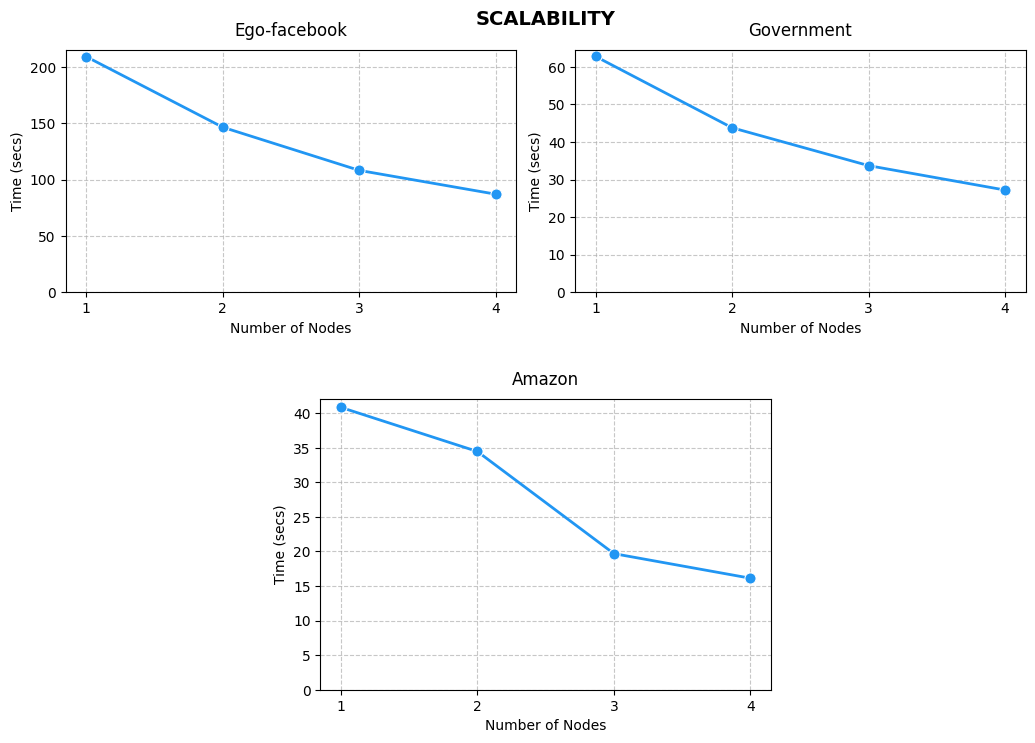

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_scalability(df):
    """
    Create scalability plots from DataFrame with columns: graph, nodes, time
    Layout: Two plots on top row, one centered plot (not full width) on bottom
    """    
    fig = plt.figure(figsize=(12, 8))
    
    gs = fig.add_gridspec(2, 4, height_ratios=[1, 1.2])
    
    ax1 = fig.add_subplot(gs[0, 0:2])  # Top left
    ax2 = fig.add_subplot(gs[0, 2:4])  # Top right
    
    ax3 = fig.add_subplot(gs[1, 1:3])  # Bottom center, using only middle columns
    
    graphs = ['Ego-facebook', 'Government', 'Amazon']
    axes = [ax1, ax2, ax3]
    
    for graph, ax in zip(graphs, axes):
        graph_data = df[df['graph'] == graph]
        
        sns.lineplot(
            data=graph_data,
            x='World Size',
            y='Time',
            marker='o',
            color='#2196F3',
            linewidth=2,
            markersize=8,
            ax=ax
        )
        
        ax.set_xticks(graph_data['World Size'].values)
        
        ax.set_title(graph, fontsize=12, pad=10)
        ax.set_xlabel('Number of Nodes')
        ax.set_ylabel('Time (secs)')
        
        ax.grid(True, linestyle='--', alpha=0.7)
        
        ax.set_ylim(bottom=0)
    
    fig.suptitle('SCALABILITY', fontsize=14, fontweight='bold', y=0.95)
    
    gs.update(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.4)
    
    return fig


df = pd.read_csv('../results/processed/exp9.csv')
df['Time'] = df['Time']/1000000
df = df.replace('amazon_q','Amazon')
df = df.replace('ego-facebook','Ego-facebook')
df = df.replace('government','Government')


fig = plot_scalability(df)

plt.savefig('../plots/distributedSystem.png', dpi=300, bbox_inches='tight')